In [1]:
import celltypist
from celltypist import models
import scanpy as sc
import numpy as np

In [2]:
# Cargar los datos
adata= sc.read_h5ad("/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_datos_concatenados/adata_concatenados_10_pt.h5ad")
adata

AnnData object with n_obs × n_vars = 53542 × 23209
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'prediction', 'doublet', 'doublet_filtered', 'Sample', 'n_genes', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
    layers: 'counts_soupx_crude', 'original_counts'

In [4]:
import numpy as np

# Verificar si adata.X es igual a alguna de las capas
if 'counts_soupx_crude' in adata.layers:
    is_crude_soupx = np.array_equal(adata.X.toarray(), adata.layers['counts_soupx_crude'].toarray())
    print("¿adata.X es counts_soupx_crude?:", is_crude_soupx)

if 'original_counts' in adata.layers:
    is_original_counts = np.array_equal(adata.X.toarray(), adata.layers['original_counts'].toarray())
    print("¿adata.X es original_counts?:", is_original_counts)


¿adata.X es counts_soupx_crude?: True
¿adata.X es original_counts?: False


In [3]:
# Si no tienes una capa de datos crudos, asegúrate de que los datos en adata.X son crudos
sc.pp.normalize_total(adata, target_sum=1e4)

# Transformación log1p (logaritmo de 1 + expresión)
sc.pp.log1p(adata)

In [2]:
#Show all available models that can be downloaded and used.
models.models_description()
#Download a specific model, for example, `Immune_All_Low.pkl`.
models.download_models(model = 'Immune_All_Low.pkl')
#Download a list of models, for example, `Immune_All_Low.pkl` and `Immune_All_High.pkl`.
models.download_models(model = ['Immune_All_Low.pkl', 'Immune_All_High.pkl'])
#Update the models by re-downloading the latest versions if you think they may be outdated.
models.download_models(model = ['Immune_All_Low.pkl', 'Immune_All_High.pkl'], force_update = True)
#Show the local directory storing these models.
models.models_path

👉 Detailed model information can be found at `https://www.celltypist.org/models`
📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 54
📂 Storing models in /home/evercher/.celltypist/data/models
💾 Total models to download: 1
💾 Downloading model [1/1]: Immune_All_Low.pkl
📂 Storing models in /home/evercher/.celltypist/data/models
💾 Total models to download: 2
⏩ Skipping [1/2]: Immune_All_Low.pkl (file exists)
💾 Downloading model [2/2]: Immune_All_High.pkl
📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 54
📂 Storing models in /home/evercher/.celltypist/data/models
💾 Total models to download: 2
💾 Downloading model [1/2]: Immune_All_Low.pkl
💾 Downloading model [2/2]: Immune_All_High.pkl


'/home/evercher/.celltypist/data/models'

In [3]:
#Download all the available models.
models.download_models()
#Update all models by re-downloading the latest versions if you think they may be outdated.
models.download_models(force_update = True)

📂 Storing models in /home/evercher/.celltypist/data/models
⏩ Skipping [1/54]: Immune_All_Low.pkl (file exists)
⏩ Skipping [2/54]: Immune_All_High.pkl (file exists)
💾 Downloading model [3/54]: Adult_COVID19_PBMC.pkl
💾 Downloading model [4/54]: Adult_CynomolgusMacaque_Hippocampus.pkl
💾 Downloading model [5/54]: Adult_Human_MTG.pkl
💾 Downloading model [6/54]: Adult_Human_PancreaticIslet.pkl
💾 Downloading model [7/54]: Adult_Human_PrefrontalCortex.pkl
💾 Downloading model [8/54]: Adult_Human_Skin.pkl
💾 Downloading model [9/54]: Adult_Human_Vascular.pkl
💾 Downloading model [10/54]: Adult_Mouse_Gut.pkl
💾 Downloading model [11/54]: Adult_Mouse_OlfactoryBulb.pkl
💾 Downloading model [12/54]: Adult_Pig_Hippocampus.pkl
💾 Downloading model [13/54]: Adult_RhesusMacaque_Hippocampus.pkl
💾 Downloading model [14/54]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [15/54]: COVID19_HumanChallenge_Blood.pkl
💾 Downloading model [16/54]: COVID19_Immune_Landscape.pkl
💾 Downloading model [17/54]: Cells_Adult_Bre

In [4]:
# Cargar los modelos desde las rutas locales
model_low = '/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Anotaciones_celltypist/.celltypist/data/models/Immune_All_Low.pkl'
model_high = '/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Anotaciones_celltypist/.celltypist/data/models/Immune_All_High.pkl'

In [12]:
model_immune_low = models.Model.load(model = '/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Anotaciones_celltypist/.celltypist/data/models/Immune_All_Low.pkl')

In [13]:
model_immune_high = models.Model.load(model = '/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Anotaciones_celltypist/.celltypist/data/models/Immune_All_High.pkl')

In [16]:
model_immune_low.cell_types

array(['Age-associated B cells', 'Alveolar macrophages', 'B cells',
       'CD16+ NK cells', 'CD16- NK cells', 'CD8a/a', 'CD8a/b(entry)',
       'CMP', 'CRTAM+ gamma-delta T cells', 'Classical monocytes',
       'Cycling B cells', 'Cycling DCs', 'Cycling NK cells',
       'Cycling T cells', 'Cycling gamma-delta T cells',
       'Cycling monocytes', 'DC', 'DC precursor', 'DC1', 'DC2', 'DC3',
       'Double-negative thymocytes', 'Double-positive thymocytes', 'ELP',
       'ETP', 'Early MK', 'Early erythroid', 'Early lymphoid/T lymphoid',
       'Endothelial cells', 'Epithelial cells', 'Erythrocytes',
       'Erythrophagocytic macrophages', 'Fibroblasts',
       'Follicular B cells', 'Follicular helper T cells', 'GMP',
       'Germinal center B cells', 'Granulocytes', 'HSC/MPP',
       'Hofbauer cells', 'ILC', 'ILC precursor', 'ILC1', 'ILC2', 'ILC3',
       'Intermediate macrophages', 'Intestinal macrophages',
       'Kidney-resident macrophages', 'Kupffer cells',
       'Large pre-B cell

In [17]:
model_immune_high.cell_types

array(['B cells', 'B-cell lineage', 'Cycling cells', 'DC', 'DC precursor',
       'Double-negative thymocytes', 'Double-positive thymocytes', 'ETP',
       'Early MK', 'Endothelial cells', 'Epithelial cells',
       'Erythrocytes', 'Erythroid', 'Fibroblasts', 'Granulocytes',
       'HSC/MPP', 'ILC', 'ILC precursor', 'MNP', 'Macrophages',
       'Mast cells', 'Megakaryocyte precursor',
       'Megakaryocytes/platelets', 'Mono-mac', 'Monocyte precursor',
       'Monocytes', 'Myelocytes', 'Plasma cells', 'Promyelocytes',
       'T cells', 'pDC', 'pDC precursor'], dtype=object)

In [5]:
# Anotar las células usando el modelo 'Immune_All_Low.pkl'
predictions_low = celltypist.annotate(adata,
                                      model='/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Anotaciones_celltypist/.celltypist/data/models/Immune_All_Low.pkl',
                                      majority_voting = True,
                                      mode = 'best match')

🔬 Input data has 53542 cells and 23209 genes
🔗 Matching reference genes in the model
🧬 5189 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
/home/evercher/miniforge3/envs/celltypist/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
⛓️ Over-clustering input data with resolution set to 20
🗳️ Majority voting the predictions
✅ Majority voting done!


In [6]:
predictions_low.predicted_labels

,predicted_labels,over_clustering,majority_voting
AAACCTGAGAAGAAGC-1_PT14,Tem/Trm cytotoxic T cells,31,Tem/Trm cytotoxic T cells
AAACCTGAGGACAGAA-1_PT14,Regulatory T cells,76,Regulatory T cells
AAACCTGAGTGGAGTC-1_PT14,Regulatory T cells,185,Regulatory T cells
AAACCTGAGTGTCTCA-1_PT14,Tem/Effector helper T cells,97,Tem/Effector helper T cells
AAACCTGCAAACTGTC-1_PT14,Type 1 helper T cells,12,Type 1 helper T cells
...,...,...,...
TTTGTCAGTGTGGCTC-1_PT50,Regulatory T cells,38,Regulatory T cells
TTTGTCATCGTGGGAA-1_PT50,Tem/Temra cytotoxic T cells,74,Tem/Temra cytotoxic T cells
TTTGTCATCTGCTGCT-1_PT50,Regulatory T cells,26,Regulatory T cells
TTTGTCATCTTGTTTG-1_PT50,Tem/Trm cytotoxic T cells,5,Tem/Trm cytotoxic T cells


In [7]:
# Convertir las predicciones a un DataFrame
low_annotations = predictions_low.to_adata().obs[[
    "predicted_labels", "over_clustering", "majority_voting", "conf_score"
]].copy()

# Añadir el barcode como una columna (ya está en el índice)
low_annotations["barcode"] = low_annotations.index

# Reorganizar las columnas para que 'barcode' sea la primera
low_annotations = low_annotations[[
    "barcode", "predicted_labels", "over_clustering", "majority_voting", "conf_score"
]]

In [8]:
# Guardar las predicciones en un archivo TSV
output_path = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_anotacion_celulas_celltypist_ProjecTIL/celltypist_immune_low_10_pts.tsv"
low_annotations.to_csv(output_path, sep="\t", index=False)  # No incluir el índice porque ya está como 'barcode'

### Hay que volver a cargar y hacer con otro modelo:

In [10]:
adata= sc.read_h5ad("/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_datos_concatenados/adata_concatenados_10_pt.h5ad")
# Si no tienes una capa de datos crudos, asegúrate de que los datos en adata.X son crudos
sc.pp.normalize_total(adata, target_sum=1e4)

# Transformación log1p (logaritmo de 1 + expresión)
sc.pp.log1p(adata)

In [11]:
# Realiza lo mismo para el modelo 'Immune_All_High.pkl'
predictions_high = celltypist.annotate(adata, 
                                       model='/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Anotaciones_celltypist/.celltypist/data/models/Immune_All_High.pkl',
                                       majority_voting = True,
                                       mode = 'best match')

🔬 Input data has 53542 cells and 23209 genes
🔗 Matching reference genes in the model
🧬 5189 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 20
🗳️ Majority voting the predictions
✅ Majority voting done!


In [12]:
predictions_high.predicted_labels

,predicted_labels,over_clustering,majority_voting
AAACCTGAGAAGAAGC-1_PT14,T cells,31,T cells
AAACCTGAGGACAGAA-1_PT14,T cells,76,T cells
AAACCTGAGTGGAGTC-1_PT14,T cells,185,T cells
AAACCTGAGTGTCTCA-1_PT14,T cells,97,T cells
AAACCTGCAAACTGTC-1_PT14,T cells,12,T cells
...,...,...,...
TTTGTCAGTGTGGCTC-1_PT50,T cells,38,T cells
TTTGTCATCGTGGGAA-1_PT50,T cells,74,T cells
TTTGTCATCTGCTGCT-1_PT50,T cells,26,T cells
TTTGTCATCTTGTTTG-1_PT50,T cells,5,T cells


In [13]:
# Convertir las predicciones a un DataFrame
high_annotations = predictions_high.to_adata().obs[[
    "predicted_labels", "over_clustering", "majority_voting", "conf_score"
]].copy()

In [14]:
# Añadir el barcode como una columna (ya está en el índice)
high_annotations["barcode"] = high_annotations.index

In [15]:
# Reorganizar las columnas para que 'barcode' sea la primera
high_annotations = high_annotations[[
    "barcode", "predicted_labels", "over_clustering", "majority_voting", "conf_score"
]]


In [16]:
# Guardar las predicciones en un archivo TSV
output_path_high = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_anotacion_celulas_celltypist_ProjecTIL/celltypist_immune_high_10_pts.tsv"
high_annotations.to_csv(output_path_high, sep="\t", index=False)  # No incluir el índice porque ya está como 'barcode'

Vamos a observar el archivo:

Guardamos el metadata que nos interesa:

In [19]:
sc.tl.umap(adata)

<Figure size 1500x1000 with 0 Axes>

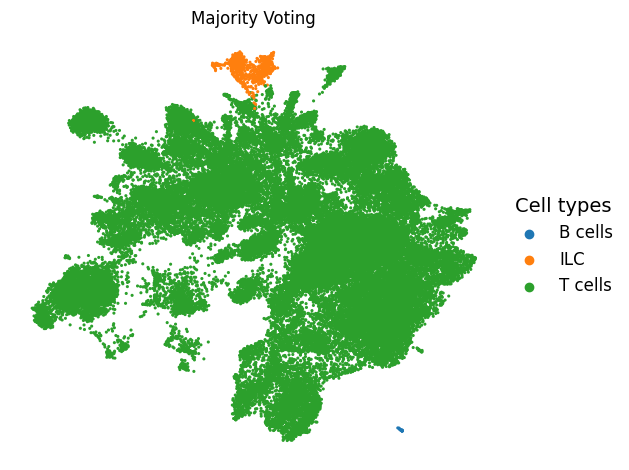

In [20]:
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura para asegurarnos de que la leyenda no interfiera
plt.figure(figsize=(15, 10))  # Aumentamos el tamaño de la figura

# Graficar el UMAP con la columna 'majority_voting' para colorear
sc.pl.umap(adata, 
           color='majority_voting', 
           legend_loc='center left', 
           frameon=False, 
           title='Majority Voting', 
           size=20,  # Ajustamos el tamaño de los puntos
           legend_fontsize=12,  # Tamaño de la leyenda
           show=False)  # No mostramos aquí para poder ajustar después

# Ajustar la posición de la leyenda para que esté a la derecha
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12, title='Cell types', title_fontsize=14)

# Ajustar el layout para asegurar que no haya superposiciones
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

# Usar una paleta de colores accesibles para daltónicos
sns.set_palette("Set2")  # Usamos una paleta accesible para daltonicos

# Configurar la figura para asegurar que no haya superposición
plt.figure(figsize=(15, 10))  # Tamaño ajustado

# Graficar el UMAP con la columna 'majority_voting' para colorear
sc.pl.umap(adata_celltypist_TIL, 
           color='majority_voting', 
           legend_loc='center left', 
           frameon=False, 
           title='Majority Voting', 
           size=20,  # Tamaño ajustado de los puntos
           legend_fontsize=12,  # Tamaño de la leyenda
           show=False,  # No mostramos aquí para poder ajustar después
           palette="Set2")  # Usamos la paleta para que sea accesible

# Obtener las coordenadas de UMAP
umap_coords = adata_celltypist_TIL.obsm['X_umap']

# Colocar los nombres de los clusters encima de cada uno, con letra pequeña
for cell_type in adata_celltypist_TIL.obs['majority_voting'].cat.categories:
    # Obtener las coordenadas de cada tipo celular
    cell_type_coords = umap_coords[adata_celltypist_TIL.obs['majority_voting'] == cell_type]
    # Promediar las coordenadas para ubicar el nombre de forma centrada en el cluster
    mean_x = cell_type_coords[:, 0].mean()
    mean_y = cell_type_coords[:, 1].mean()
    
    # Colocar el nombre del tipo celular sobre el gráfico
    plt.text(mean_x, mean_y, cell_type, fontsize=8, ha='center', va='center', color='black')

# Ajustar la posición de la leyenda a la derecha
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12, title='Cell types', title_fontsize=14)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico final
plt.show()

In [23]:
import pandas as pd

# Cargar los datos desde los archivos TSV
low_file_path = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_anotacion_celulas_celltypist_ProjecTIL/celltypist_immune_low_10_pts.tsv"
high_file_path = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_anotacion_celulas_celltypist_ProjecTIL/celltypist_immune_high_10_pts.tsv"

# Leer los archivos TSV
low_data = pd.read_csv(low_file_path, sep="\t")
high_data = pd.read_csv(high_file_path, sep="\t")

# Agrupar por 'majority_voting' y calcular estadísticas de 'conf_score' para los datos Low
low_table = low_data.groupby('majority_voting')['conf_score'].agg(['count', 'mean', 'min', 'max'])

# Calcular el porcentaje de células por tipo
low_table['percentage'] = (low_table['count'] / low_data.shape[0]) * 100

# Ordenar la tabla por el porcentaje de células de mayor a menor
low_table_sorted = low_table.sort_values('percentage', ascending=False)

# Mostrar la tabla ordenada
print("Low Table Statistics:")
print(low_table_sorted)

# Agrupar por 'majority_voting' y calcular estadísticas de 'conf_score' para los datos High
high_table = high_data.groupby('majority_voting')['conf_score'].agg(['count', 'mean', 'min', 'max'])

# Calcular el porcentaje de células por tipo
high_table['percentage'] = (high_table['count'] / high_data.shape[0]) * 100

# Ordenar la tabla por el porcentaje de células de mayor a menor
high_table_sorted = high_table.sort_values('percentage', ascending=False)

# Mostrar la tabla ordenada
print("\nHigh Table Statistics:")
print(high_table_sorted)



Low Table Statistics:
                             count      mean       min       max  percentage
majority_voting                                                             
Tem/Trm cytotoxic T cells    19423  0.635872  0.000561  1.000000   36.276194
Tem/Effector helper T cells  10507  0.585593  0.004856  0.999967   19.623847
Type 1 helper T cells         7107  0.529849  0.001064  0.999943   13.273692
Regulatory T cells            6095  0.882905  0.010407  1.000000   11.383587
Tem/Temra cytotoxic T cells   5501  0.608095  0.001723  1.000000   10.274177
Tcm/Naive helper T cells      1380  0.619047  0.000539  0.999995    2.577416
Type 17 helper T cells        1333  0.507247  0.000824  0.999981    2.489634
gamma-delta T cells            809  0.676678  0.006526  0.999996    1.510963
MAIT cells                     647  0.718904  0.006193  1.000000    1.208397
CD16- NK cells                 332  0.651089  0.010919  1.000000    0.620074
CD16+ NK cells                 295  0.708510  0.020865

In [24]:
import pandas as pd

# Rutas proporcionadas
low_file_path = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_anotacion_celulas_celltypist_ProjecTIL/celltypist_immune_low_10_pts.tsv"
high_file_path = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_anotacion_celulas_celltypist_ProjecTIL/celltypist_immune_high_10_pts.tsv"

# Leer los archivos TSV
low_data = pd.read_csv(low_file_path, sep="\t")
high_data = pd.read_csv(high_file_path, sep="\t")

# Añadir sufijos a las columnas de cada archivo
low_data = low_data.add_suffix("_low")
high_data = high_data.add_suffix("_high")

# Restaurar la columna de barcodes sin sufijos
low_data.rename(columns={"barcode_low": "barcode"}, inplace=True)
high_data.rename(columns={"barcode_high": "barcode"}, inplace=True)

# Unir ambos archivos por la columna 'barcode'
merged_data = pd.merge(low_data, high_data, on="barcode", how="outer")

# Guardar el archivo combinado
output_path = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_anotacion_celulas_celltypist_ProjecTIL/celltypist_immune_low_high_10pts.tsv"
merged_data.to_csv(output_path, sep="\t", index=False)


Unimos los datos al concatenado del que hemos sacado todo:

In [3]:
import scanpy as sc
import pandas as pd

adata = sc.read_h5ad("/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_datos_concatenados/adata_concatenados_10_pt.h5ad")

# Cargar el archivo combinado con las anotaciones
annotations = pd.read_csv("/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_anotacion_celulas_celltypist_ProjecTIL/celltypist_projecTIL_10_pts.tsv", sep="\t")

In [4]:
# Asegurarse de que las columnas de barcode coinciden y añadir las nuevas columnas al metadata
annotations.set_index('barcode', inplace=True)
adata.obs = adata.obs.join(annotations, how="left")

In [6]:
# Guardar el objeto actualizado
output_path = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_datos_concatenados/adata_concatenados_ANNOTD_10_pt.h5ad"
adata.write(output_path)

In [1]:
import scanpy as sc
import pandas as pd

In [8]:
# Ruta del archivo
file_path = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/04_datos_concatenados/adata_concatenados_ANNOTD_10_pt.h5ad"

# Cargar el archivo con scanpy
adata = sc.read_h5ad(file_path)

Comprobamos la anotacion:

In [9]:
import scanpy.external as sce

In [11]:
# Normalizar los datos
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [12]:
# Detectar los 3000 genes más variables, manteniendo todos los genes en el objeto
sc.pp.highly_variable_genes(adata, n_top_genes=3000, batch_key='Sample', subset=False)

/home/evercher/miniforge3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/home/evercher/miniforge3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/home/evercher/miniforge3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated

In [13]:
hvg_data_harmony = adata[:, adata.var['highly_variable']].copy()

In [ ]:
# Regresión para eliminar efectos no deseados
sc.pp.regress_out(hvg_data_harmony, keys=['pct_counts_mt', 'pct_counts_ribo'])

In [ ]:
# Escalar los datos de los HVG
sc.pp.scale(hvg_data_harmony, max_value=10)

In [ ]:
# Calcular PCA con los HVG ajustados
sc.tl.pca(hvg_data_harmony, n_comps=50)

In [ ]:
sce.pp.harmony_integrate(hvg_data_harmony, key='Sample')

In [ ]:
# Calcular vecinos y UMAP con las PCs ajustadas por Harmony
sc.pp.neighbors(hvg_data_harmony, use_rep='X_pca_harmony')
sc.tl.umap(hvg_data_harmony)

In [ ]:
sc.pl.umap(
    hvg_data_harmony,
    color=["majority_voting_low", "conf_score_low"],
    frameon=False,
    sort_order=False,
    wspace=1,
)

In [ ]:
# Generar dendrograma agrupando por 'majority_voting_low'
sc.tl.dendrogram(hvg_data_harmony, groupby="majority_voting_low")
sc.pl.dendrogram(hvg_data_harmony, groupby="majority_voting_low")